CHURN PREDICTION RUN THE FILE IN COLAB FOR BETTER RESULTS

In [9]:
# Optimized Advanced Bank Customer Churn Prediction with Enhanced Techniques
!pip install -q lightgbm catboost imbalanced-learn plotly
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Advanced ML Libraries
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Advanced preprocessing and feature engineering
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

# Advanced metrics and evaluation
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                           roc_auc_score, roc_curve, precision_recall_curve, f1_score,
                           precision_score, recall_score, average_precision_score)
from sklearn.model_selection import learning_curve, validation_curve

# Statistical tests
from scipy.stats import chi2_contingency, ttest_ind

# Set advanced plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

IT MAY TAKE FEW MINUTES TO RUN THE WHOLE PIPELINE

🚀 Starting OPTIMIZED Advanced Bank Customer Churn Prediction Pipeline
DATASET OVERVIEW
Dataset Shape: (10000, 14)
Memory Usage: 2.64 MB

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  

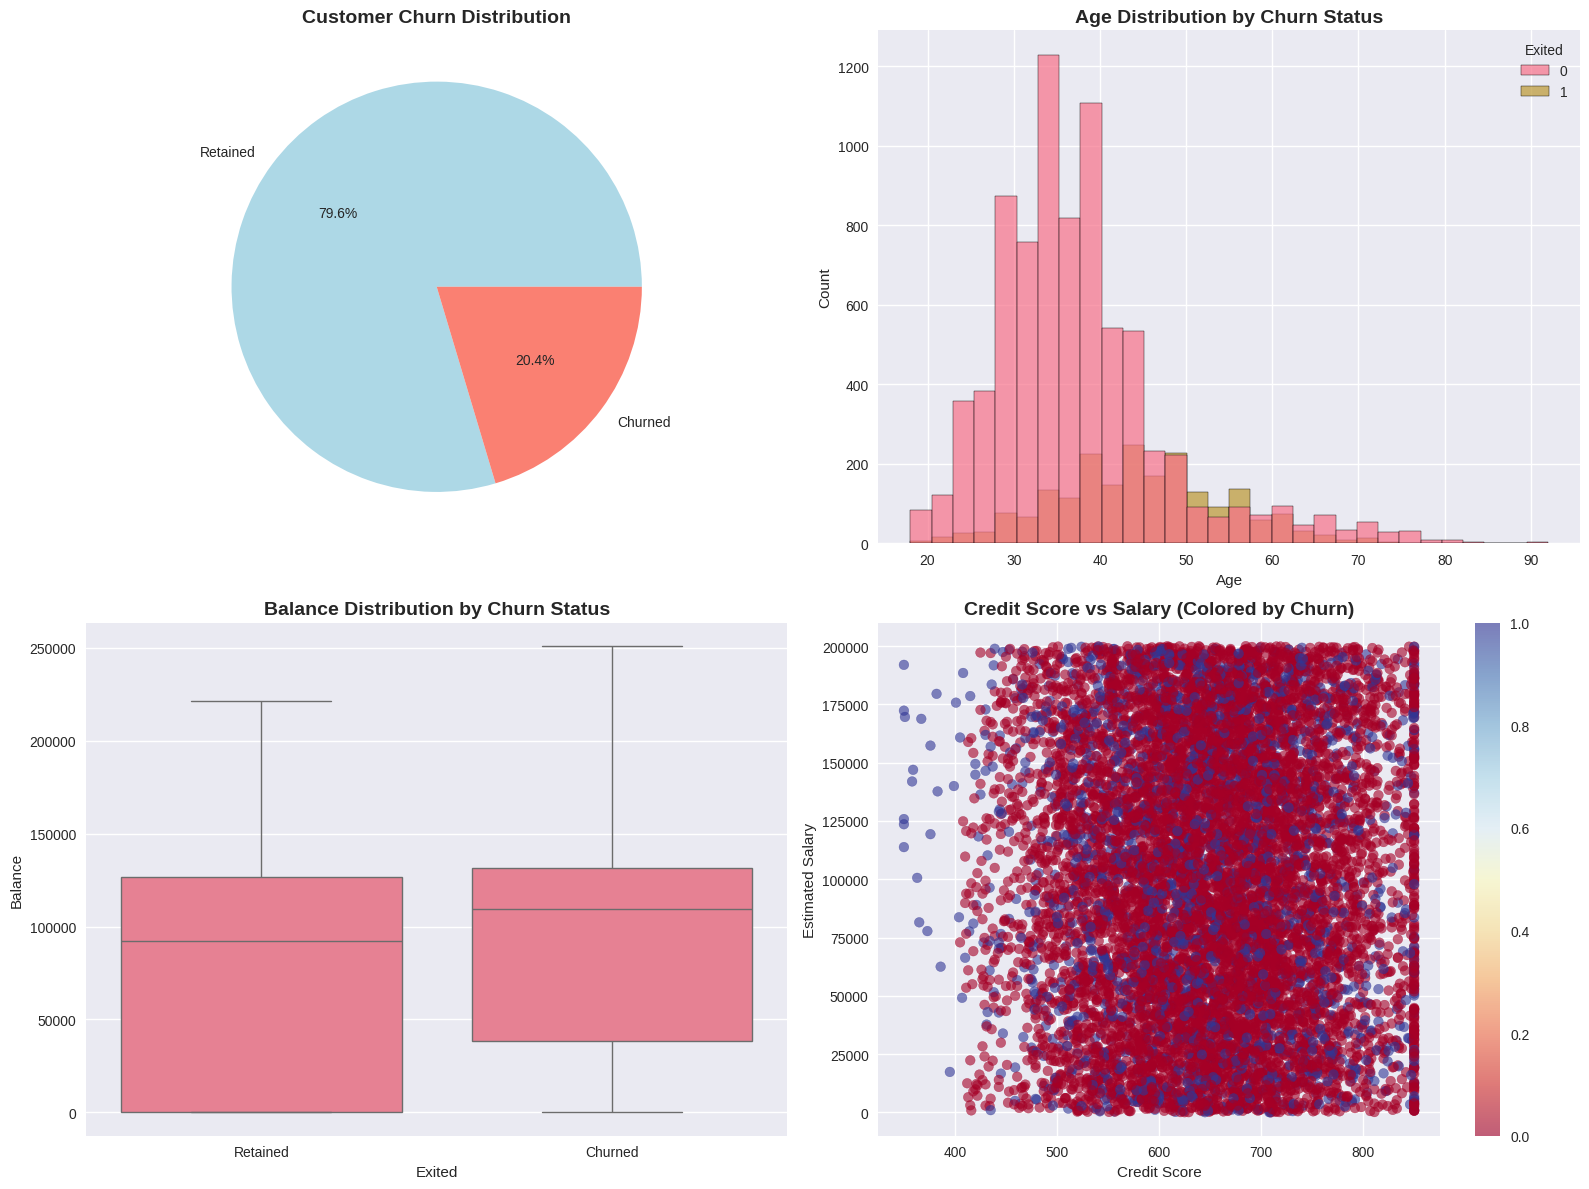

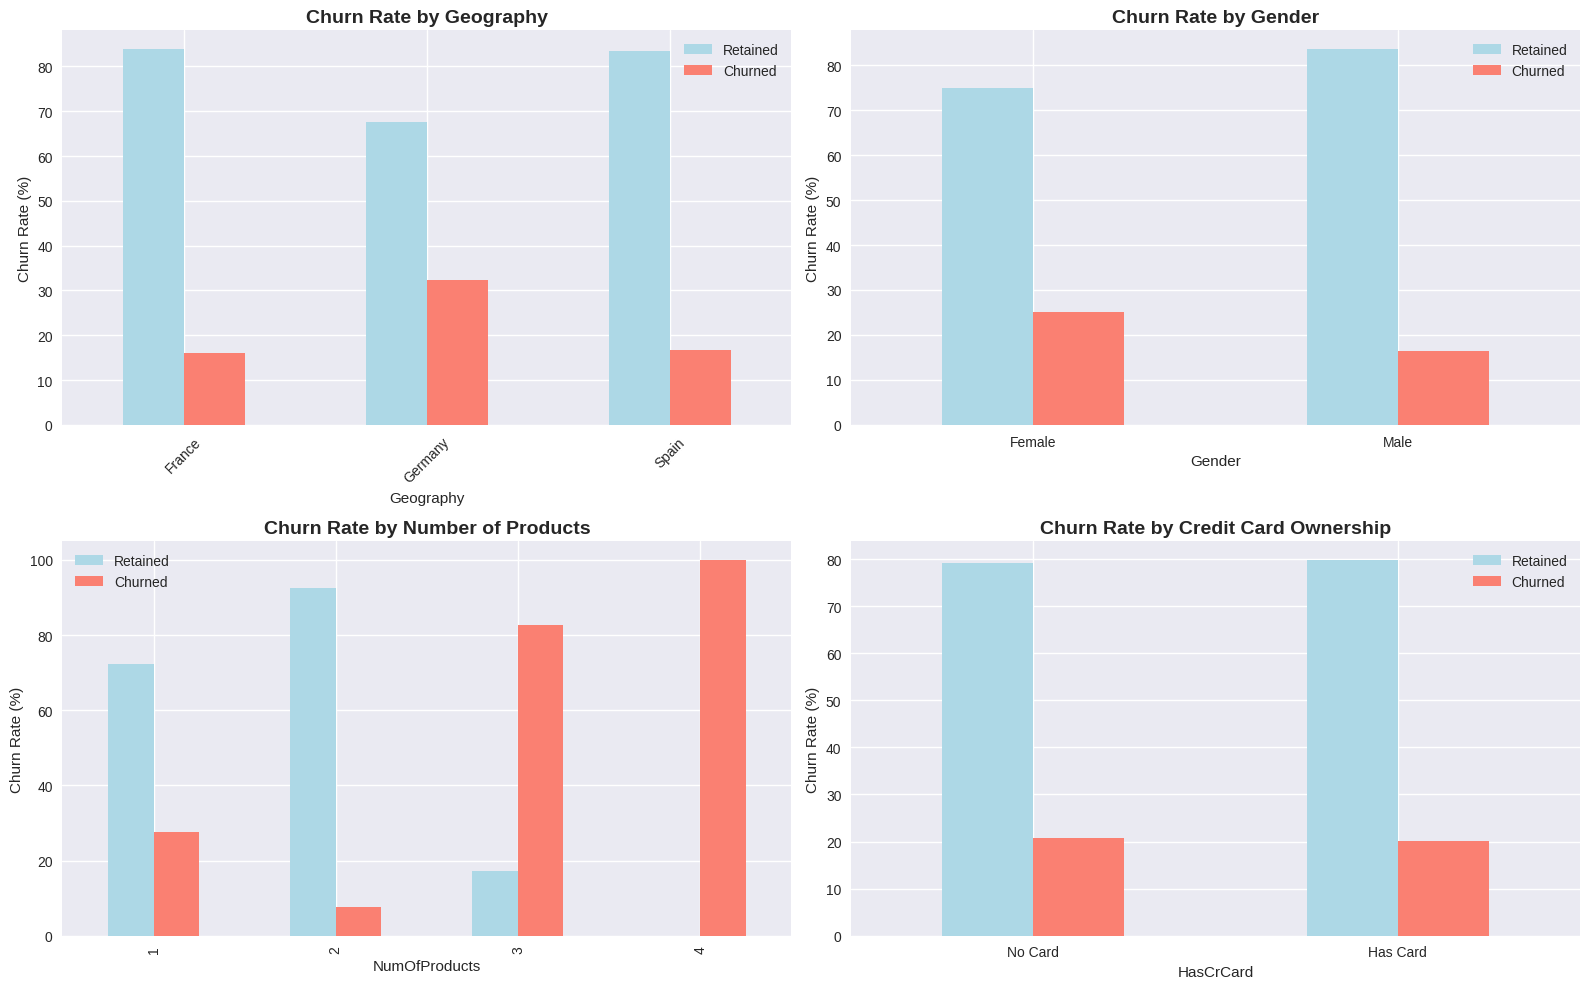

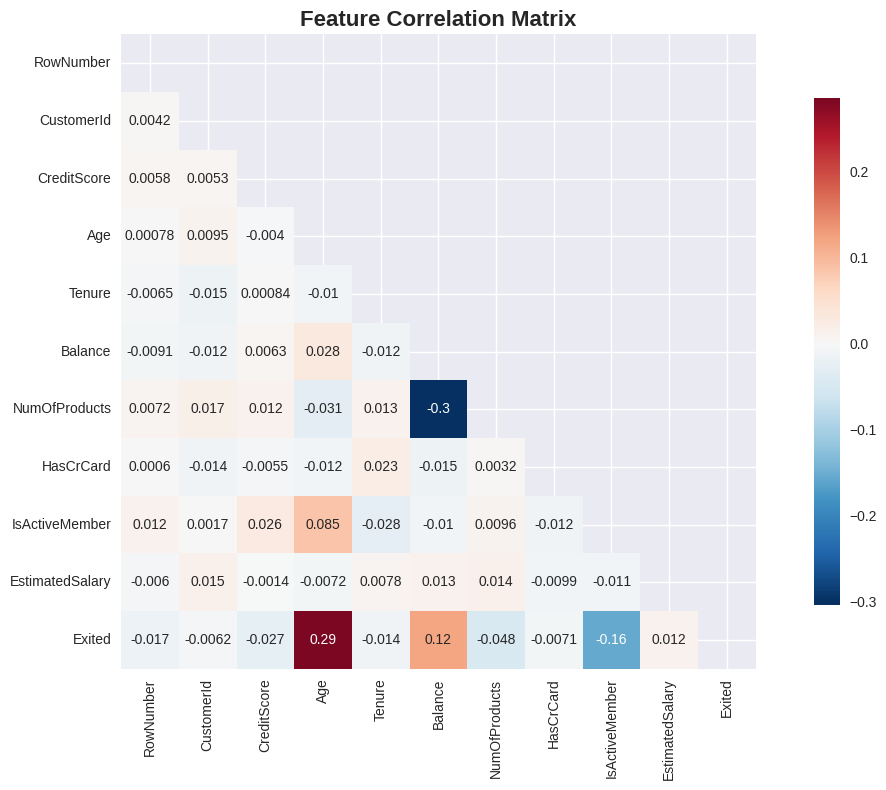


🔧 Applying Advanced Feature Engineering...

⚙️ Advanced Preprocessing...

🎯 Applying Advanced Sampling Techniques...
Original distribution: [6370 1630]
Resampled distribution: [6370 6370]

🤖 Building and Evaluating OPTIMIZED Advanced Models...

Training Logistic Regression...

Training Random Forest...

Training XGBoost...

Training LightGBM...

Training Extra Trees...

Training Naive Bayes...

📈 Model Performance Results:
                 Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC  \
0  Logistic Regression    0.7490     0.4204  0.6167    0.5000   0.7582   
1        Random Forest    0.8330     0.5953  0.5602    0.5772   0.8432   
2              XGBoost    0.8415     0.6154  0.5897    0.6023   0.8589   
3             LightGBM    0.8405     0.6117  0.5921    0.6017   0.8567   
4          Extra Trees    0.8310     0.5896  0.5577    0.5732   0.8441   
5          Naive Bayes    0.7970     0.5024  0.2580    0.3409   0.7379   

   CV Mean  CV Std                                   

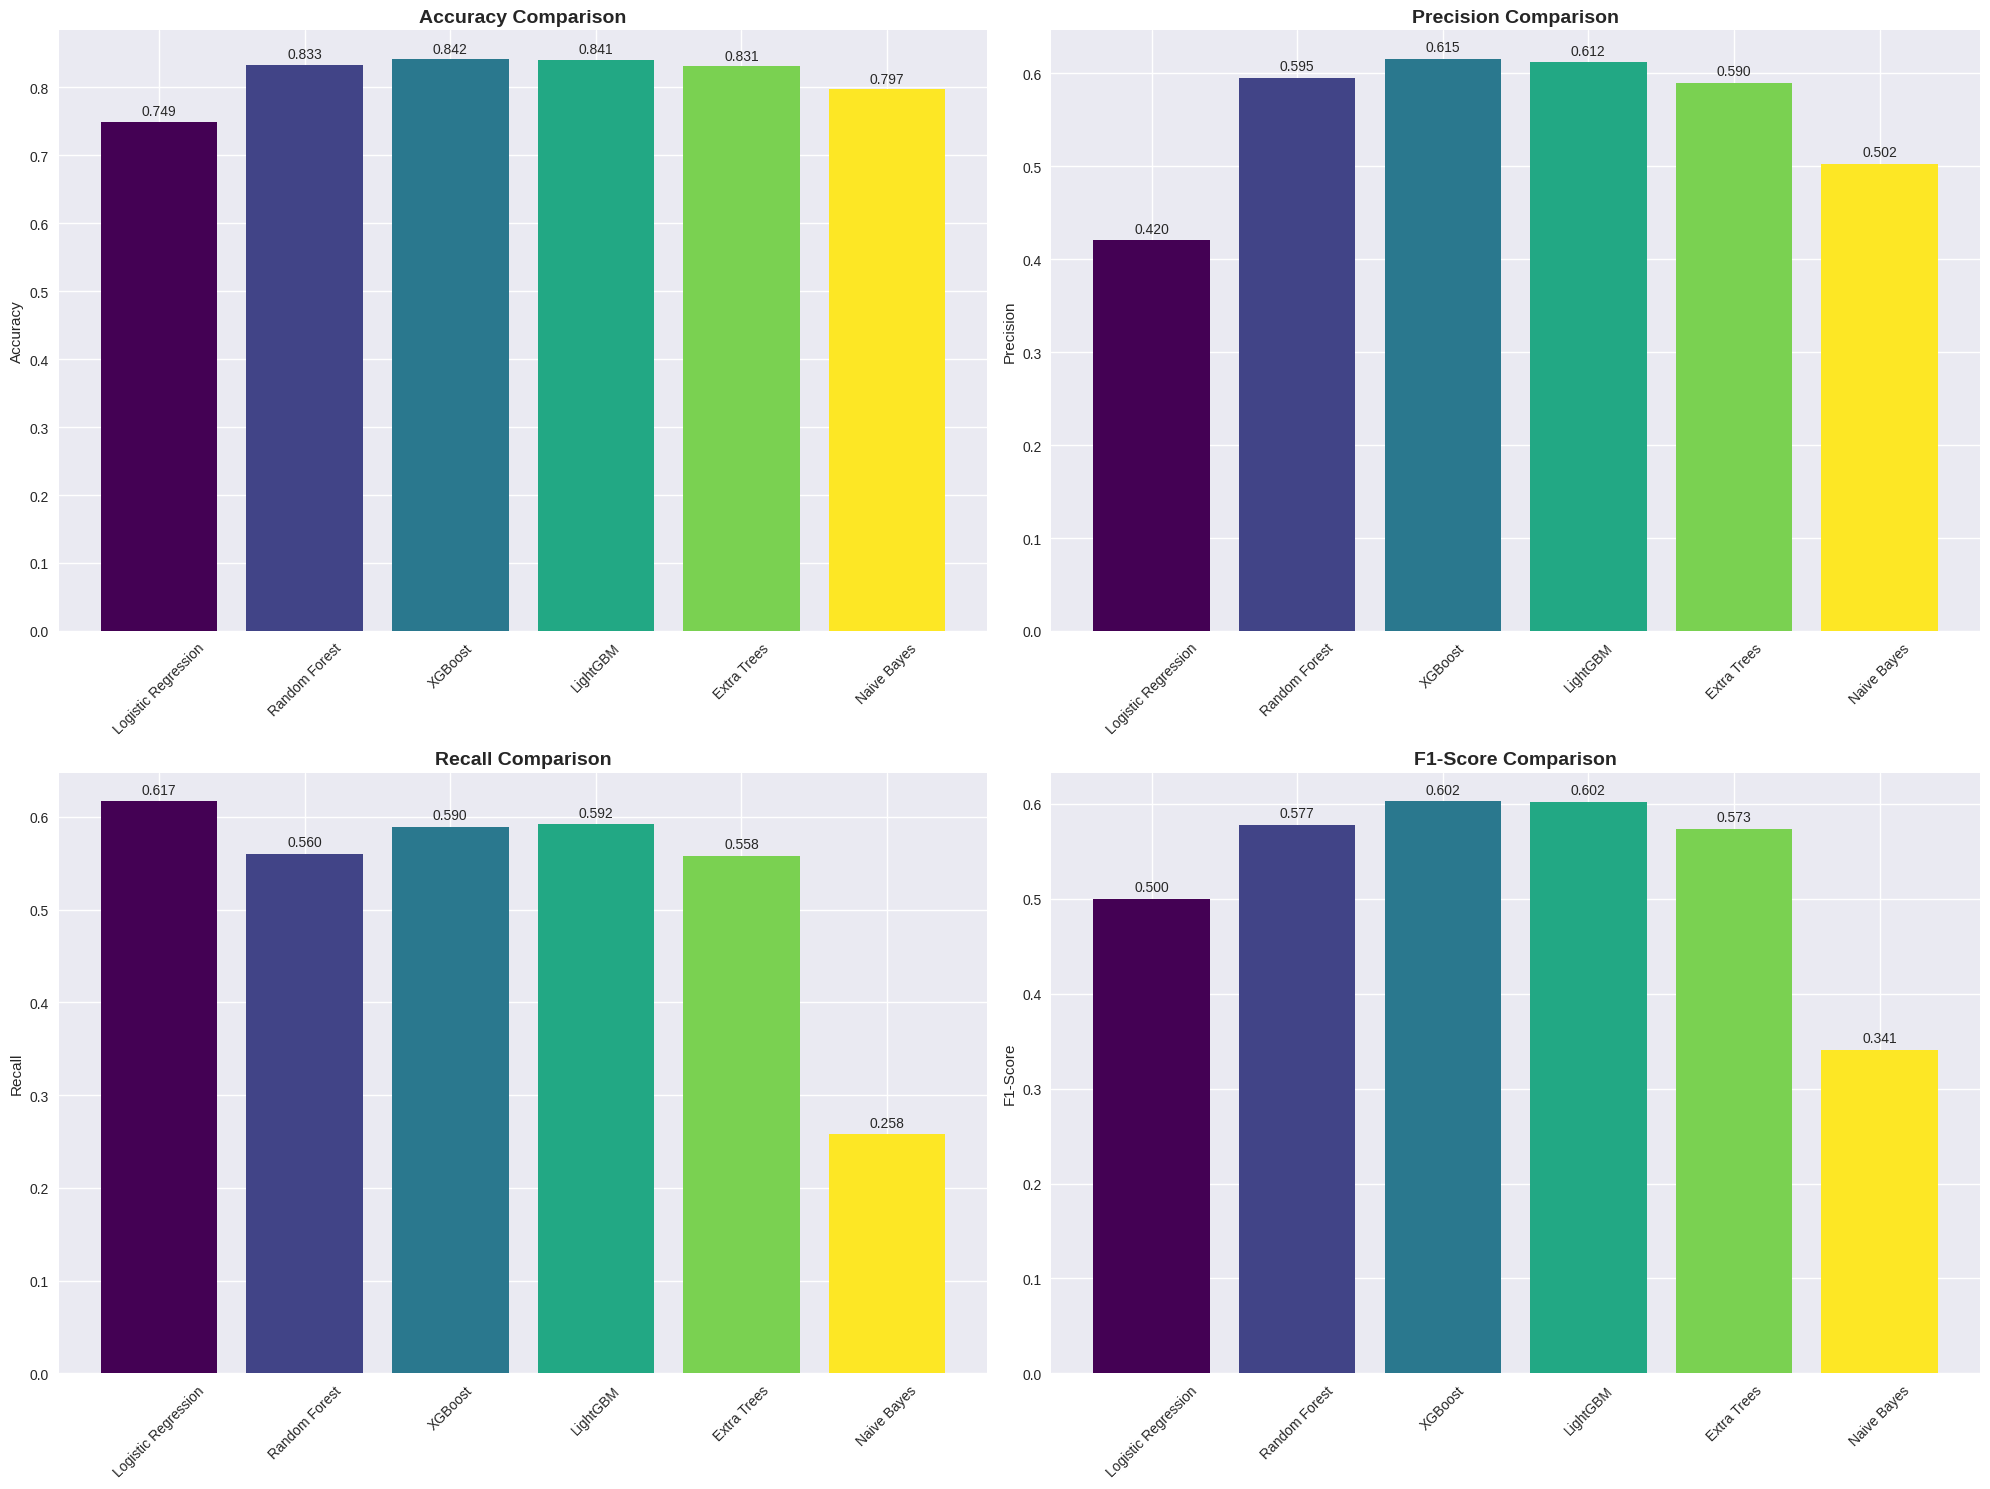

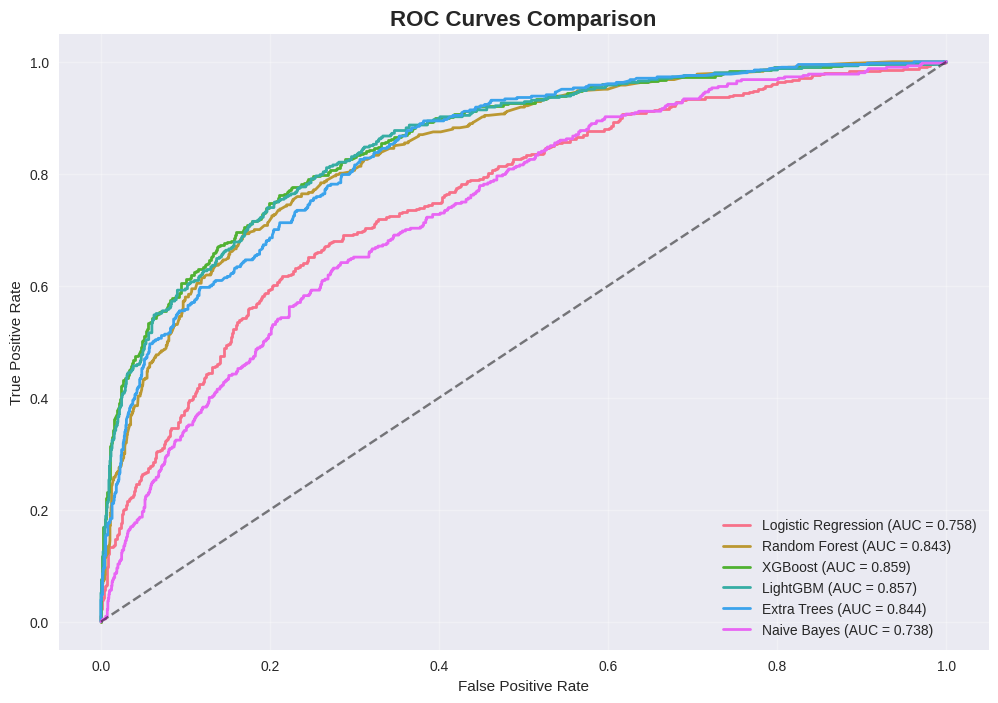

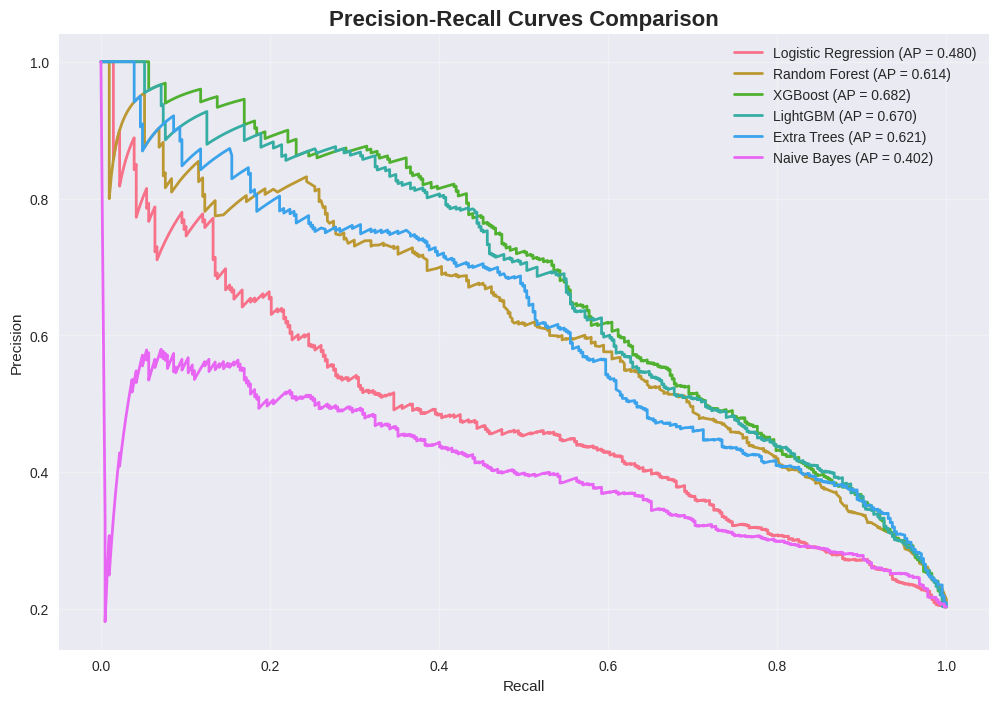

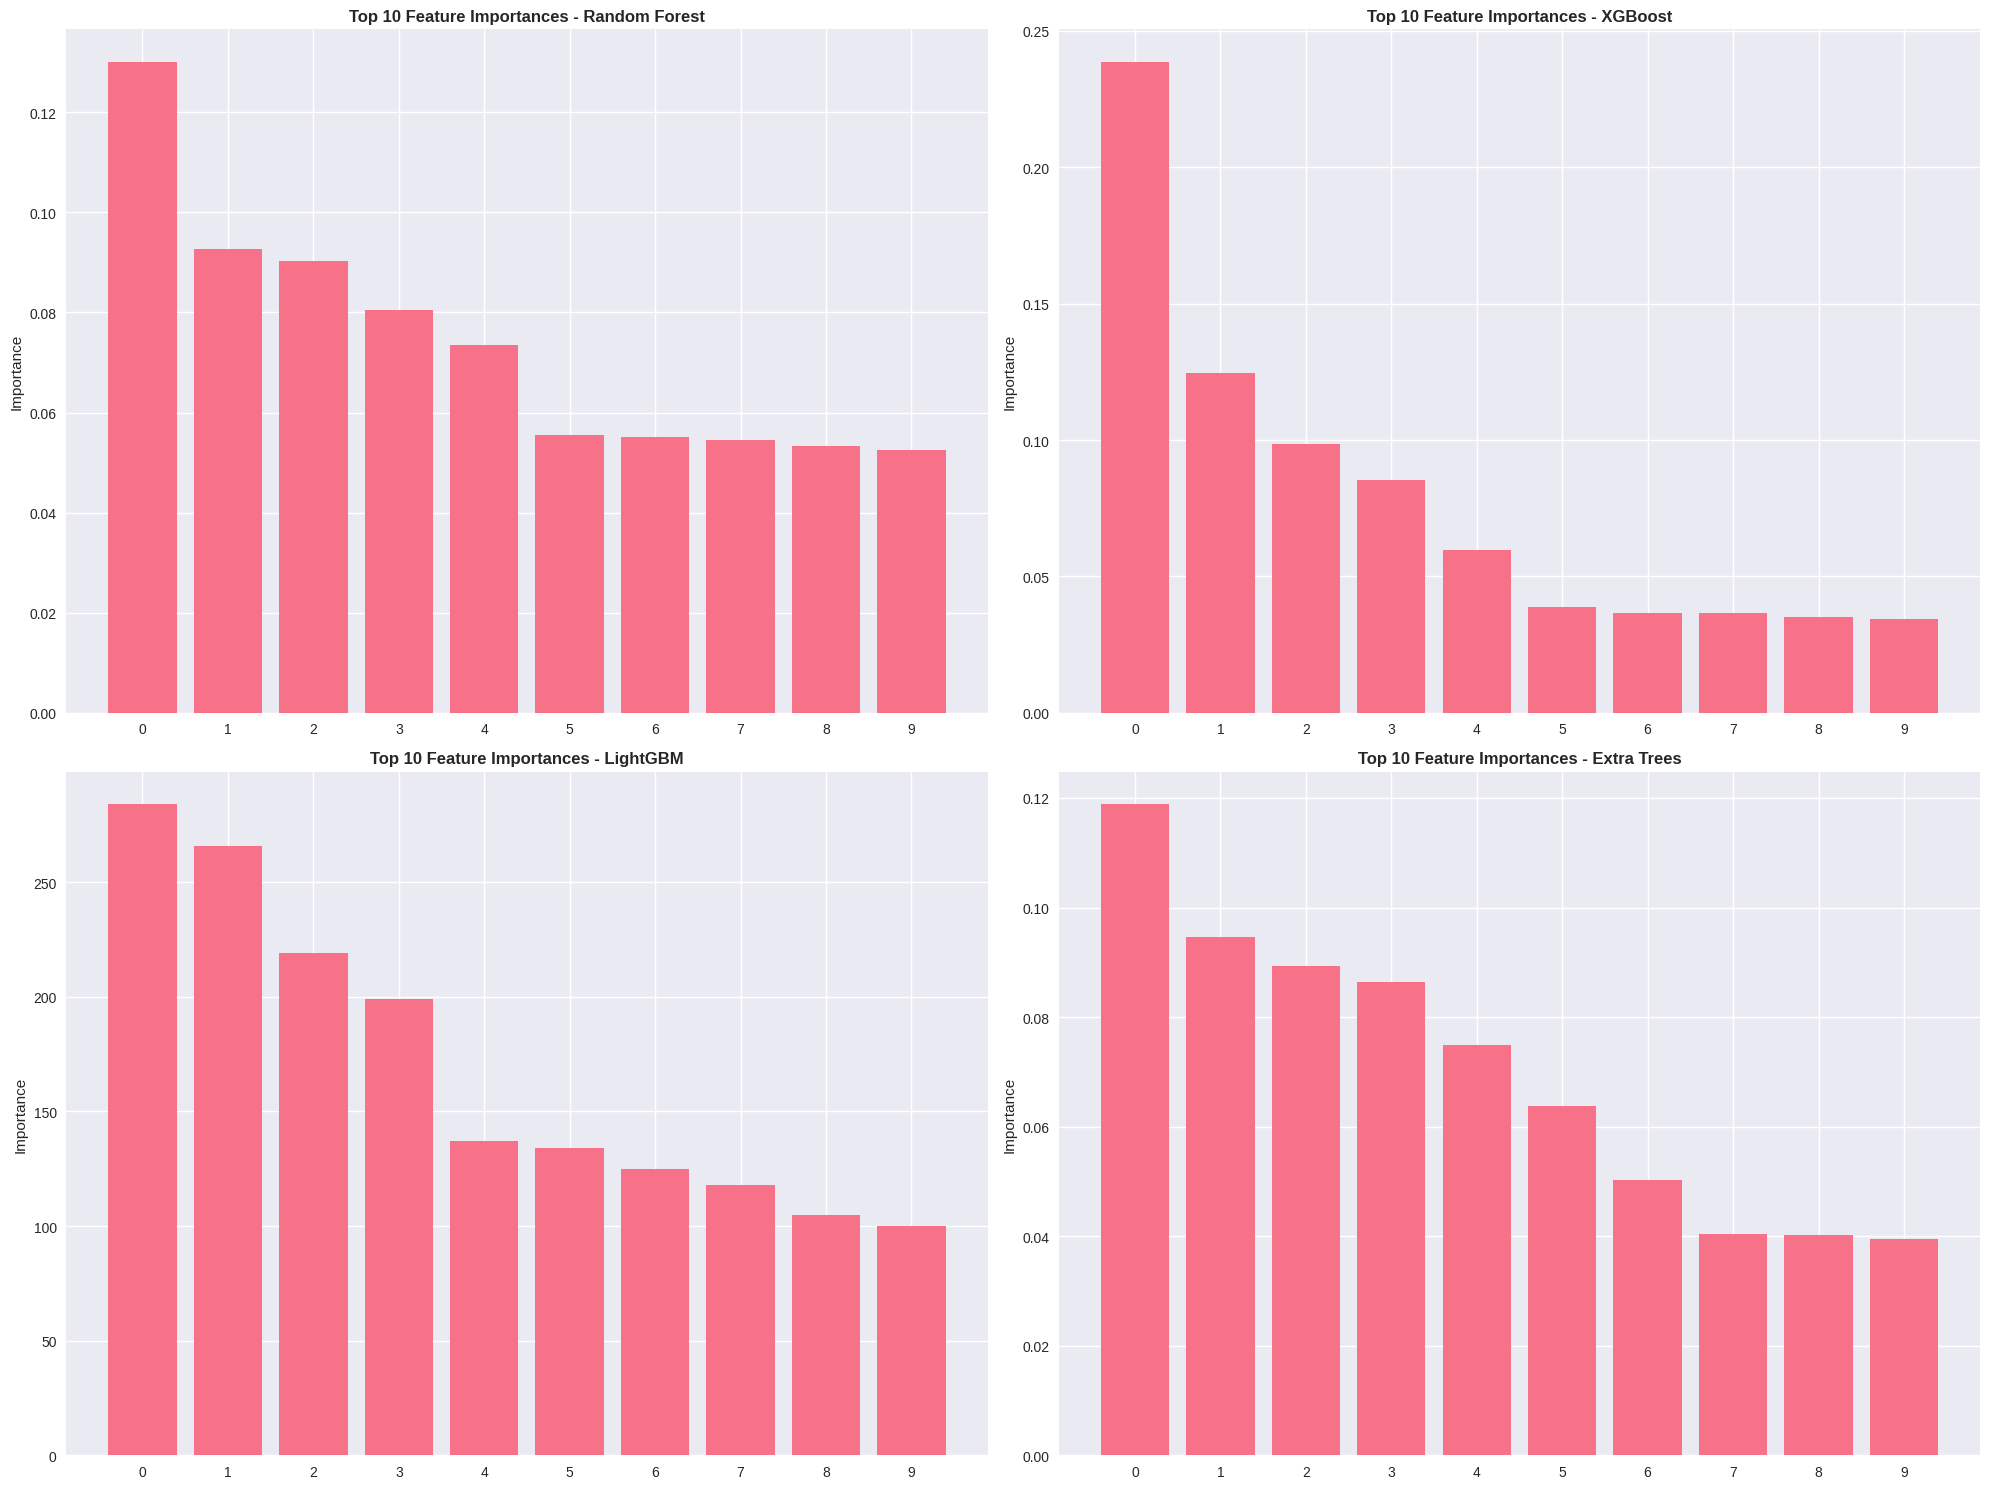


🎭 Creating Ensemble Model...

🏆 Ensemble Model Performance:
Accuracy: 0.8280
Precision: 0.5759
Recall: 0.5872
F1-Score: 0.5815
ROC-AUC: 0.8461

🎯 FINAL RESULTS SUMMARY:
Best Single Model: XGBoost (F1-Score: 0.6023)
Ensemble Model F1-Score: 0.5815
🏅 Best single model performed better than ensemble.


In [10]:
# =============================================================================
# DATA LOADING AND INITIAL EXPLORATION
# =============================================================================

def load_and_explore_data(file_path):
    """Load data and perform comprehensive exploration"""
    df = pd.read_csv(file_path)

    print("=" * 60)
    print("DATASET OVERVIEW")
    print("=" * 60)
    print(f"Dataset Shape: {df.shape}")
    print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

    # Basic info
    print("\nColumn Information:")
    print(df.info())

    # Statistical summary
    print("\nStatistical Summary:")
    print(df.describe())

    # Missing values analysis
    missing_data = df.isnull().sum()
    if missing_data.sum() > 0:
        print("\nMissing Values:")
        print(missing_data[missing_data > 0])
    else:
        print("\nNo missing values found ✓")

    # Duplicate analysis
    duplicates = df.duplicated().sum()
    print(f"Duplicate rows: {duplicates}")

    return df

# =============================================================================
# ADVANCED EXPLORATORY DATA ANALYSIS
# =============================================================================

def advanced_eda(df):
    """Perform comprehensive exploratory data analysis"""

    # 1. Target variable analysis
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Churn distribution
    churn_counts = df['Exited'].value_counts()
    axes[0, 0].pie(churn_counts.values, labels=['Retained', 'Churned'],
                   autopct='%1.1f%%', colors=['lightblue', 'salmon'])
    axes[0, 0].set_title('Customer Churn Distribution', fontsize=14, fontweight='bold')

    # Age distribution by churn
    sns.histplot(data=df, x='Age', hue='Exited', bins=30, alpha=0.7, ax=axes[0, 1])
    axes[0, 1].set_title('Age Distribution by Churn Status', fontsize=14, fontweight='bold')

    # Balance distribution by churn
    sns.boxplot(data=df, x='Exited', y='Balance', ax=axes[1, 0])
    axes[1, 0].set_title('Balance Distribution by Churn Status', fontsize=14, fontweight='bold')
    axes[1, 0].set_xticklabels(['Retained', 'Churned'])

    # Credit Score vs Estimated Salary colored by churn
    scatter = axes[1, 1].scatter(df['CreditScore'], df['EstimatedSalary'],
                                c=df['Exited'], alpha=0.6, cmap='RdYlBu')
    axes[1, 1].set_xlabel('Credit Score')
    axes[1, 1].set_ylabel('Estimated Salary')
    axes[1, 1].set_title('Credit Score vs Salary (Colored by Churn)', fontsize=14, fontweight='bold')
    plt.colorbar(scatter, ax=axes[1, 1])

    plt.tight_layout()
    plt.show()

    # 2. Advanced categorical analysis
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))

    # Geography analysis
    geo_churn = pd.crosstab(df['Geography'], df['Exited'], normalize='index') * 100
    geo_churn.plot(kind='bar', ax=axes[0, 0], color=['lightblue', 'salmon'])
    axes[0, 0].set_title('Churn Rate by Geography', fontsize=14, fontweight='bold')
    axes[0, 0].set_ylabel('Churn Rate (%)')
    axes[0, 0].legend(['Retained', 'Churned'])
    axes[0, 0].tick_params(axis='x', rotation=45)

    # Gender analysis
    gender_churn = pd.crosstab(df['Gender'], df['Exited'], normalize='index') * 100
    gender_churn.plot(kind='bar', ax=axes[0, 1], color=['lightblue', 'salmon'])
    axes[0, 1].set_title('Churn Rate by Gender', fontsize=14, fontweight='bold')
    axes[0, 1].set_ylabel('Churn Rate (%)')
    axes[0, 1].legend(['Retained', 'Churned'])
    axes[0, 1].tick_params(axis='x', rotation=0)

    # Number of Products analysis
    prod_churn = pd.crosstab(df['NumOfProducts'], df['Exited'], normalize='index') * 100
    prod_churn.plot(kind='bar', ax=axes[1, 0], color=['lightblue', 'salmon'])
    axes[1, 0].set_title('Churn Rate by Number of Products', fontsize=14, fontweight='bold')
    axes[1, 0].set_ylabel('Churn Rate (%)')
    axes[1, 0].legend(['Retained', 'Churned'])

    # Card ownership analysis
    card_churn = pd.crosstab(df['HasCrCard'], df['Exited'], normalize='index') * 100
    card_churn.plot(kind='bar', ax=axes[1, 1], color=['lightblue', 'salmon'])
    axes[1, 1].set_title('Churn Rate by Credit Card Ownership', fontsize=14, fontweight='bold')
    axes[1, 1].set_ylabel('Churn Rate (%)')
    axes[1, 1].legend(['Retained', 'Churned'])
    axes[1, 1].set_xticklabels(['No Card', 'Has Card'], rotation=0)

    plt.tight_layout()
    plt.show()

    # 3. Correlation heatmap
    plt.figure(figsize=(12, 8))
    correlation_matrix = df.select_dtypes(include=[np.number]).corr()
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
                square=True, mask=mask, cbar_kws={"shrink": .8})
    plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# =============================================================================
# ADVANCED FEATURE ENGINEERING
# =============================================================================

def advanced_feature_engineering(df):
    """Create advanced features for better model performance"""
    df_engineered = df.copy()

    # Remove unnecessary columns
    df_engineered = df_engineered.drop(['RowNumber', 'Surname', 'CustomerId'], axis=1)

    # 1. Age-based features
    df_engineered['AgeGroup'] = pd.cut(df_engineered['Age'],
                                      bins=[0, 30, 40, 50, 60, 100],
                                      labels=['Young', 'Adult', 'Middle', 'Senior', 'Elder'])

    # 2. Balance-based features
    df_engineered['HasBalance'] = (df_engineered['Balance'] > 0).astype(int)
    df_engineered['BalanceGroup'] = pd.cut(df_engineered['Balance'],
                                          bins=[0, 50000, 100000, 150000, float('inf')],
                                          labels=['Low', 'Medium', 'High', 'VeryHigh'])

    # 3. Tenure-based features
    df_engineered['TenureGroup'] = pd.cut(df_engineered['Tenure'],
                                         bins=[0, 2, 5, 8, 10],
                                         labels=['New', 'Developing', 'Established', 'Loyal'])

    # 4. Credit Score categories
    df_engineered['CreditScoreGroup'] = pd.cut(df_engineered['CreditScore'],
                                              bins=[0, 600, 700, 800, 850],
                                              labels=['Poor', 'Fair', 'Good', 'Excellent'])

    # 5. Salary-based features
    df_engineered['SalaryGroup'] = pd.cut(df_engineered['EstimatedSalary'],
                                         bins=[0, 50000, 100000, 150000, float('inf')],
                                         labels=['Low', 'Medium', 'High', 'VeryHigh'])

    # 6. Interaction features
    df_engineered['BalanceToSalaryRatio'] = df_engineered['Balance'] / (df_engineered['EstimatedSalary'] + 1)
    df_engineered['CreditScoreToAge'] = df_engineered['CreditScore'] / df_engineered['Age']
    df_engineered['ProductsPerYear'] = df_engineered['NumOfProducts'] / (df_engineered['Tenure'] + 1)

    # 7. Risk features
    df_engineered['HighRiskProfile'] = (
        (df_engineered['Age'] > 60) |
        (df_engineered['NumOfProducts'] >= 3) |
        (df_engineered['Balance'] == 0)
    ).astype(int)

    # 8. Engagement features
    df_engineered['CustomerValue'] = (
        df_engineered['Balance'] * 0.4 +
        df_engineered['EstimatedSalary'] * 0.3 +
        df_engineered['CreditScore'] * 0.3
    )

    return df_engineered

# =============================================================================
# ADVANCED PREPROCESSING
# =============================================================================

def advanced_preprocessing(df):
    """Advanced preprocessing with multiple techniques"""

    # Label encoding for categorical variables
    le_dict = {}
    categorical_cols = ['Geography', 'Gender']

    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        le_dict[col] = le

    # Handle categorical features created during feature engineering
    cat_features = ['AgeGroup', 'BalanceGroup', 'TenureGroup', 'CreditScoreGroup', 'SalaryGroup']

    for col in cat_features:
        if col in df.columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            le_dict[col] = le

    return df, le_dict

# =============================================================================
# ADVANCED SAMPLING TECHNIQUES
# =============================================================================

def apply_advanced_sampling(X, y, method='smote'):
    """Apply advanced sampling techniques"""

    if method == 'smote':
        # Reduced k_neighbors for faster execution
        sampler = SMOTE(random_state=42, k_neighbors=3)
    elif method == 'adasyn':
        sampler = ADASYN(random_state=42, n_neighbors=3)
    elif method == 'smote_tomek':
        sampler = SMOTETomek(random_state=42, smote=SMOTE(k_neighbors=3))
    elif method == 'undersample':
        sampler = RandomUnderSampler(random_state=42)

    X_resampled, y_resampled = sampler.fit_resample(X, y)

    print(f"Original distribution: {np.bincount(y)}")
    print(f"Resampled distribution: {np.bincount(y_resampled)}")

    return X_resampled, y_resampled

# =============================================================================
# OPTIMIZED MODEL BUILDING
# =============================================================================

def build_advanced_models():
    """Build advanced models with OPTIMIZED hyperparameter tuning"""

    models = {
        'Logistic Regression': {
            'model': LogisticRegression(random_state=42, max_iter=1000),
            'params': {
                'C': [0.1, 1, 10],  # Reduced from 4 to 3 options
                'penalty': ['l2'],   # Removed l1 to avoid solver issues
                'solver': ['lbfgs']  # Faster solver
            }
        },
        'Random Forest': {
            'model': RandomForestClassifier(random_state=42, n_jobs=-1),
            'params': {
                'n_estimators': [50, 100],  # Reduced from [100, 200, 300]
                'max_depth': [10, 20],      # Reduced from [10, 20, None]
                'min_samples_split': [2, 5] # Reduced from [2, 5, 10]
            }
        },
        'XGBoost': {
            'model': XGBClassifier(random_state=42, eval_metric='logloss', n_jobs=-1),
            'params': {
                'n_estimators': [50, 100],    # Reduced from [100, 200, 300]
                'max_depth': [3, 6],          # Reduced from [3, 6, 9]
                'learning_rate': [0.1, 0.2],  # Reduced from [0.01, 0.1, 0.2]
                'subsample': [0.8, 1.0]       # Reduced from [0.8, 0.9, 1.0]
            }
        },
        'LightGBM': {
            'model': LGBMClassifier(random_state=42, verbose=-1, n_jobs=-1),
            'params': {
                'n_estimators': [50, 100],    # Reduced from [100, 200, 300]
                'max_depth': [3, 6],          # Reduced from [3, 6, 9]
                'learning_rate': [0.1, 0.2],  # Reduced from [0.01, 0.1, 0.2]
                'num_leaves': [31, 50]        # Reduced from [31, 50, 70]
            }
        },
        'Extra Trees': {
            'model': ExtraTreesClassifier(random_state=42, n_jobs=-1),
            'params': {
                'n_estimators': [50, 100],  # Reduced from [100, 200, 300]
                'max_depth': [10, 20],      # Reduced from [10, 20, None]
                'min_samples_split': [2, 5] # Reduced from [2, 5, 10]
            }
        },
        # Removed SVM and CatBoost as they are slower
        'Naive Bayes': {
            'model': GaussianNB(),
            'params': {
                'var_smoothing': [1e-9, 1e-8, 1e-7]  # Fast model with minimal tuning
            }
        }
    }

    return models

# =============================================================================
# OPTIMIZED MODEL EVALUATION
# =============================================================================

def evaluate_models_advanced(models, X_train, X_test, y_train, y_test):
    """Comprehensive model evaluation with OPTIMIZED parameters"""

    results = []
    best_models = {}

    for name, config in models.items():
        print(f"\nTraining {name}...")

        # OPTIMIZED: Reduced hyperparameter tuning iterations
        grid_search = RandomizedSearchCV(
            config['model'],
            config['params'],
            cv=3,           # Reduced from 5 to 3
            scoring='f1',
            n_iter=6,       # Reduced from 20 to 6
            random_state=42,
            n_jobs=-1
        )

        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        best_models[name] = best_model

        # Predictions
        y_pred = best_model.predict(X_test)
        y_pred_proba = best_model.predict_proba(X_test)[:, 1]

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        # OPTIMIZED: Reduced cross-validation folds
        cv_scores = cross_val_score(best_model, X_train, y_train, cv=3, scoring='f1')
        cv_mean = cv_scores.mean()
        cv_std = cv_scores.std()

        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC-AUC': roc_auc,
            'CV Mean': cv_mean,
            'CV Std': cv_std,
            'Best Params': grid_search.best_params_
        })

    results_df = pd.DataFrame(results)
    return results_df, best_models

# =============================================================================
# ADVANCED VISUALIZATION
# =============================================================================

def plot_advanced_results(results_df, best_models, X_test, y_test):
    """Create advanced visualizations for model results"""

    # 1. Comprehensive metrics comparison
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))

    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

    for i, metric in enumerate(metrics):
        ax = axes[i//2, i%2]
        bars = ax.bar(results_df['Model'], results_df[metric],
                     color=plt.cm.viridis(np.linspace(0, 1, len(results_df))))
        ax.set_title(f'{metric} Comparison', fontsize=14, fontweight='bold')
        ax.set_ylabel(metric)
        ax.tick_params(axis='x', rotation=45)

        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                   f'{height:.3f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    # 2. ROC Curves
    plt.figure(figsize=(12, 8))

    for name, model in best_models.items():
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc = roc_auc_score(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})', linewidth=2)

    plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves Comparison', fontsize=16, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # 3. Precision-Recall Curves
    plt.figure(figsize=(12, 8))

    for name, model in best_models.items():
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        avg_precision = average_precision_score(y_test, y_pred_proba)
        plt.plot(recall, precision, label=f'{name} (AP = {avg_precision:.3f})', linewidth=2)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves Comparison', fontsize=16, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # 4. Feature Importance (for tree-based models) - OPTIMIZED
    tree_models = ['Random Forest', 'XGBoost', 'LightGBM', 'Extra Trees']
    available_tree_models = [name for name in tree_models if name in best_models.keys()]

    if available_tree_models:
        n_models = len(available_tree_models)
        if n_models == 1:
            fig, ax = plt.subplots(1, 1, figsize=(12, 6))
            axes = [ax]
        elif n_models == 2:
            fig, axes = plt.subplots(1, 2, figsize=(20, 6))
        else:
            fig, axes = plt.subplots(2, 2, figsize=(20, 15))
            axes = axes.flatten()

        for i, name in enumerate(available_tree_models[:4]):
            if hasattr(best_models[name], 'feature_importances_'):
                importances = best_models[name].feature_importances_
                indices = np.argsort(importances)[::-1][:10]  # Top 10 features

                axes[i].bar(range(len(indices)), importances[indices])
                axes[i].set_title(f'Top 10 Feature Importances - {name}', fontweight='bold')
                axes[i].set_ylabel('Importance')
                axes[i].set_xticks(range(len(indices)))

        plt.tight_layout()
        plt.show()

# =============================================================================
# ENSEMBLE METHODS
# =============================================================================

def create_ensemble_model(best_models, X_train, y_train, X_test, y_test):
    """Create ensemble model using best performing models"""

    # Select top 3 models based on F1-score
    top_models = [(name, model) for name, model in best_models.items()][:3]

    # Create voting classifier
    voting_clf = VotingClassifier(
        estimators=top_models,
        voting='soft',
        n_jobs=-1  # OPTIMIZED: Use parallel processing
    )

    voting_clf.fit(X_train, y_train)
    y_pred = voting_clf.predict(X_test)
    y_pred_proba = voting_clf.predict_proba(X_test)[:, 1]

    # Evaluate ensemble
    ensemble_metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba)
    }

    return voting_clf, ensemble_metrics

# =============================================================================
# MAIN EXECUTION PIPELINE
# =============================================================================

def main_pipeline(file_path):
    """Execute the complete OPTIMIZED advanced pipeline"""

    print("🚀 Starting OPTIMIZED Advanced Bank Customer Churn Prediction Pipeline")
    print("=" * 80)

    # 1. Load and explore data
    df = load_and_explore_data(file_path)

    # 2. Advanced EDA
    print("\n📊 Performing Advanced Exploratory Data Analysis...")
    advanced_eda(df)

    # 3. Feature engineering
    print("\n🔧 Applying Advanced Feature Engineering...")
    df_engineered = advanced_feature_engineering(df)

    # 4. Preprocessing
    print("\n⚙️ Advanced Preprocessing...")
    df_processed, le_dict = advanced_preprocessing(df_engineered)

    # 5. Prepare features and target
    X = df_processed.drop('Exited', axis=1)
    y = df_processed['Exited']

    # 6. Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # 7. Advanced sampling
    print("\n🎯 Applying Advanced Sampling Techniques...")
    X_train_resampled, y_train_resampled = apply_advanced_sampling(X_train, y_train, method='smote')

    # 8. Feature scaling
    scaler = RobustScaler()  # More robust to outliers
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)

    # 9. Build and evaluate models
    print("\n🤖 Building and Evaluating OPTIMIZED Advanced Models...")
    models = build_advanced_models()
    results_df, best_models = evaluate_models_advanced(
        models, X_train_scaled, X_test_scaled, y_train_resampled, y_test
    )

    # 10. Display results
    print("\n📈 Model Performance Results:")
    print("=" * 80)
    print(results_df.round(4))

    # 11. Advanced visualizations
    print("\n📊 Creating Advanced Visualizations...")
    plot_advanced_results(results_df, best_models, X_test_scaled, y_test)

    # 12. Create ensemble model
    print("\n🎭 Creating Ensemble Model...")
    ensemble_model, ensemble_metrics = create_ensemble_model(
        best_models, X_train_scaled, y_train_resampled, X_test_scaled, y_test
    )

    print("\n🏆 Ensemble Model Performance:")
    for metric, value in ensemble_metrics.items():
        print(f"{metric}: {value:.4f}")

    # 13. Final summary
    best_single_model = results_df.loc[results_df['F1-Score'].idxmax(), 'Model']
    best_f1_score = results_df['F1-Score'].max()

    print(f"\n🎯 FINAL RESULTS SUMMARY:")
    print(f"Best Single Model: {best_single_model} (F1-Score: {best_f1_score:.4f})")
    print(f"Ensemble Model F1-Score: {ensemble_metrics['F1-Score']:.4f}")

    if ensemble_metrics['F1-Score'] > best_f1_score:
        print("🏅 Ensemble model outperformed individual models!")
    else:
        print("🏅 Best single model performed better than ensemble.")

    return results_df, best_models, ensemble_model, ensemble_metrics

# =============================================================================
# USAGE EXAMPLE
# =============================================================================

# To run the pipeline, uncomment the following line and provide your file path:
results_df, best_models, ensemble_model, ensemble_metrics = main_pipeline('/content/Customer Churn Prediction ML DataSet.csv')